In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


##Probability Distributions

In [6]:
import collections

testlist = [1, 4, 5, 6, 9, 9, 9]
c = collections.Counter(testlist)
print c

# calculate the number of instances in the list
count_sum = sum(c.values())

for k,v in c.iteritems():
  print "The probability of number " + str(k) + " is " + str(float(v) / count_sum)

Counter({9: 3, 1: 1, 4: 1, 5: 1, 6: 1})
The probability of number 1 is 0.142857142857
The probability of number 4 is 0.142857142857
The probability of number 5 is 0.142857142857
The probability of number 6 is 0.142857142857
The probability of number 9 is 0.428571428571


{'boxes': [<matplotlib.lines.Line2D at 0x1056525d0>],
 'caps': [<matplotlib.lines.Line2D at 0x105655550>,
 'fliers': [<matplotlib.lines.Line2D at 0x105658850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x105658210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x105652810>,
  <matplotlib.lines.Line2D at 0x105652ed0>]}

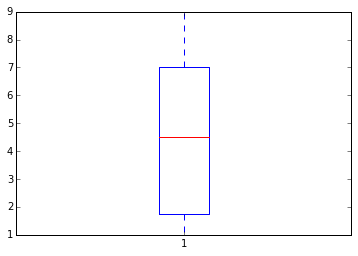

In [9]:
import matplotlib.pyplot as plt
x = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9]
plt.boxplot(x)

(array([ 8.,  3.,  1.,  4.,  0.,  1.,  3.,  8.,  2.,  2.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

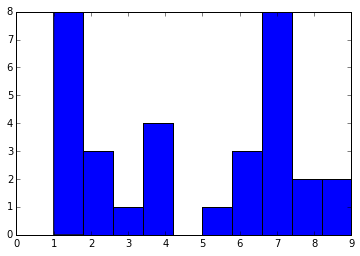

In [10]:
plt.hist(x, histtype='bar')

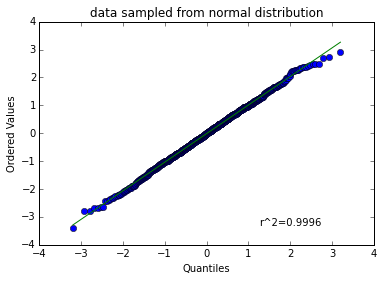

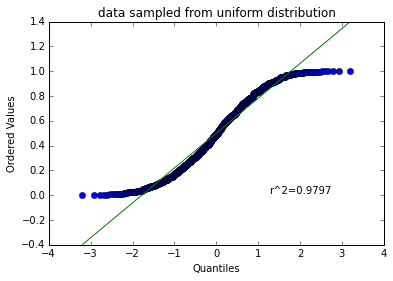

In [12]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure()
test_data = np.random.normal(size=1000)   
graph1 = stats.probplot(test_data, dist="norm", plot=plt)
plt.title('data sampled from normal distribution')
plt.figure()
test_data2 = np.random.uniform(size=1000)   
graph2 = stats.probplot(test_data2, dist="norm", plot=plt)
plt.title('data sampled from uniform distribution')

Write a script called "prob.py" that outputs frequencies, as well as creates and saves a boxplot, a histogram, and a QQ-plot for the data in this lesson. Make sure your plots have names that are reasonably descriptive. Push your code to GitHub and enter the link below.

In [2]:
%%writefile scripts/prob.py

import scipy.stats
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

def print_frequencies(data):
    counts=Counter(data)
    for i in sorted(counts.keys()):
        print "probability of %s: %.3f" %(i, float(counts[i])/np.sum(counts.values()))
        
def save_boxplot(data):
    f,ax=plt.subplots(figsize=[3,4])
    ax.set_ylim([0,10])
    sns.boxplot(data, ax=ax)
    ax.set_xticks([])
    ax.set_title('boxplot')
    plt.tight_layout()
    plt.savefig("../figs/data_boxplot.png")
    
def save_histogram(data):
    f,ax=plt.subplots(figsize=[4,4])
    ax.hist(data)
    ax.set_label('frequency')
    ax.set_title('histogram')
    plt.tight_layout()
    plt.savefig("../figs/data_hist.png")
    
def save_qqplot(data):
    f,ax=plt.subplots(figsize=[4,4])
    scipy.stats.probplot(data, dist="norm", plot=plt)
    ax.set_title('qqplot')
    plt.tight_layout()
    plt.savefig("../figs/data_qqplot.png")

if __name__=="__main__":
    
    data= [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9]
    
    print_frequencies(data)
    save_boxplot(data)
    save_histogram(data)
    save_qqplot(data)

Overwriting scripts/prob.py


####EXTRA: visualization of various distributions

In [46]:
def visualize_distribution(distname, params, param_order):
    if len(params)<2:
        params['']=[None]
        param_order.append('')
    distributions={"normal":np.random.normal,
               "beta":np.random.beta,
               "poisson":np.random.poisson,
               "gamma":np.random.gamma,
               "geometric":np.random.geometric,
               "exponential":np.random.exponential,
               "laplace":np.random.laplace,
               "chisquare":np.random.chisquare,
               "hypergeometric":np.random.hypergeometric,
               "pareto":np.random.pareto}
    param1s, param2s=params[param_order[0]],params[param_order[1]]
    f,axes=plt.subplots(len(param2s), len(param1s), figsize=[len(param1s)*3, len(param2s)*1.5], sharex=True, sharey=True)
    f.suptitle(distname)
    axes=axes.flatten()
    count=0
    for p2 in param2s:
        for p1 in param1s:
            if p2 is not None:
                ax=axes[count].hist(distributions[distname](p1, p2, size=1000), bins=25)
            else:
                ax=axes[count].hist(distributions[distname](p1, size=1000), bins=25)
            if count>len(param1s)*len(param2s)-len(param1s)-1:
                axes[count].set_xlabel("%s: %s"%(param_order[0],p1))
            if count%len(param1s)==0 and p2 is not None:
                axes[count].set_ylabel("%s: %s"%(param_order[1],p2))
            count+=1

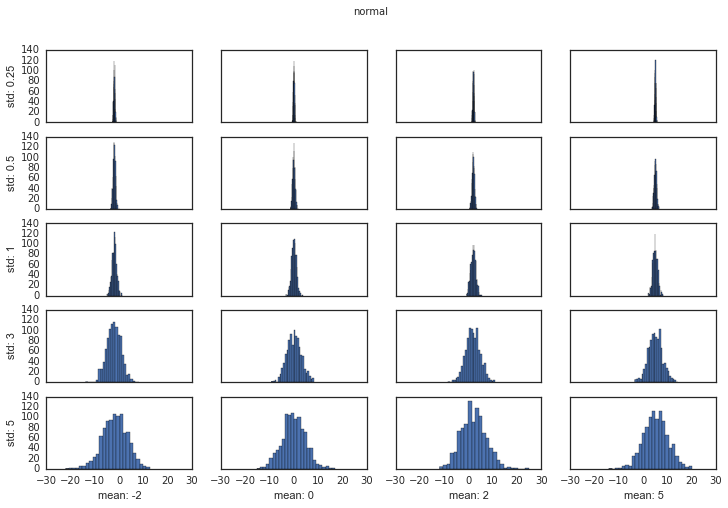

In [47]:
#sample from normal distributions
means=[-2,-0,2,5]
stds=[.25, .5, 1, 3, 5]
visualize_distribution('normal', {'mean':means, 'std':stds}, ['mean', 'std'])

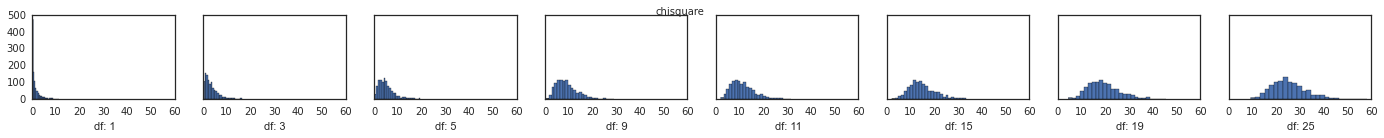

In [48]:
dfs=[1,3,5,9,11,15,19,25]
visualize_distribution('chisquare', {'df':dfs}, ['df'])

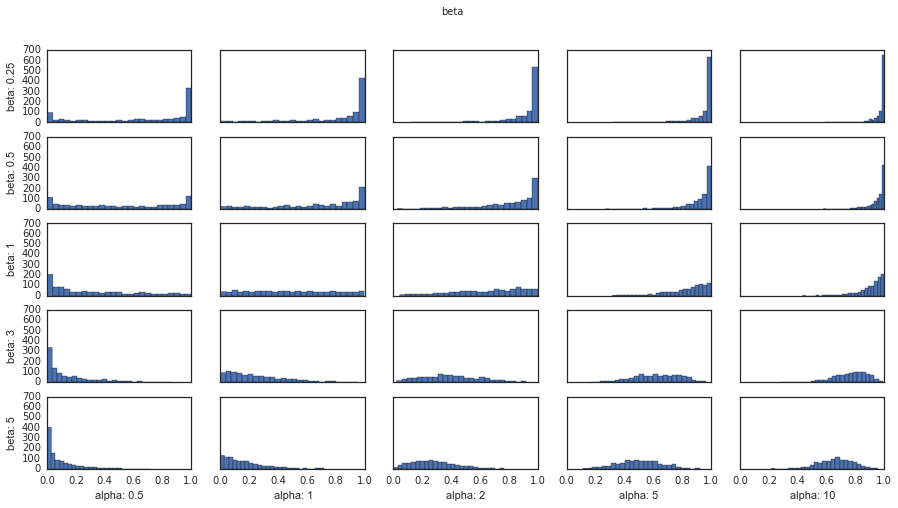

In [49]:
alphas=[.5, 1, 2, 5, 10]
betas=[.25, .5, 1, 3, 5]
visualize_distribution('beta', {'alpha':alphas, 'beta':betas}, ['alpha', 'beta'])


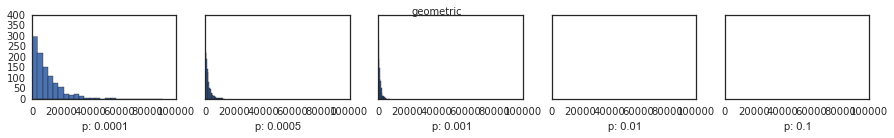

In [50]:
ps=[.0001, .0005, .001, .01, .1,]
visualize_distribution('geometric', {'p':ps}, ['p'])

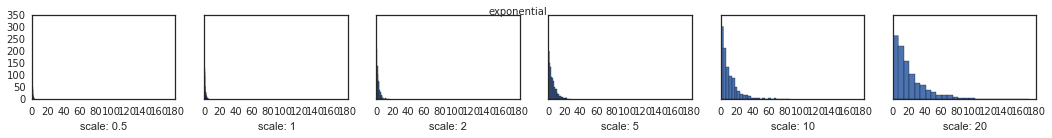

In [51]:
scalers=[.5, 1, 2, 5, 10, 20]
visualize_distribution('exponential', {'scale':scalers}, ['scale'])

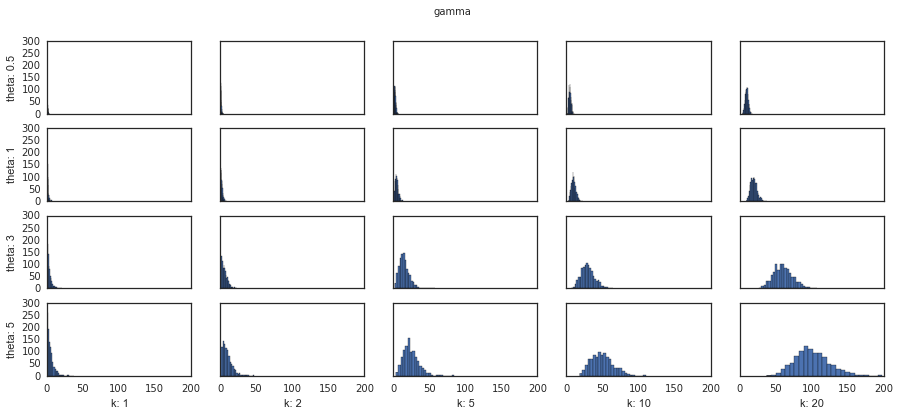

In [52]:
ks=[1, 2, 5, 10, 20]
thetas=[.5, 1, 3, 5]
visualize_distribution("gamma", {'k':ks, 'theta':thetas}, ['k', 'theta'])

##Visualizing Lending Club Data

In [65]:
import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData.dropna(inplace=True)

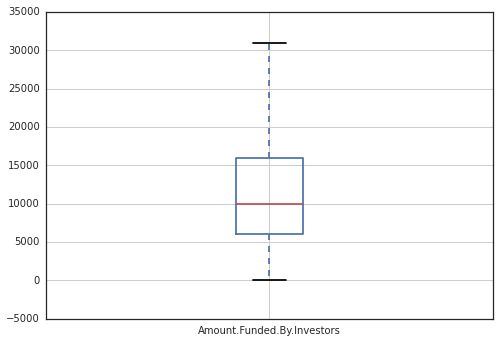

In [66]:
_=loansData.boxplot(column='Amount.Funded.By.Investors')

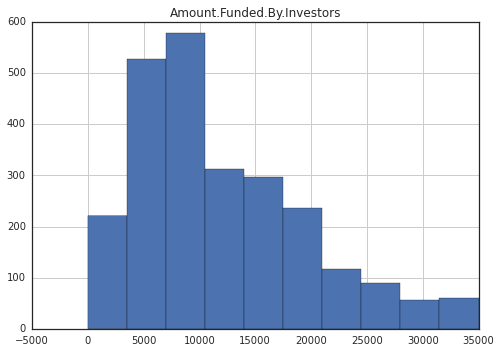

In [67]:
_=loansData.hist(column='Amount.Funded.By.Investors')

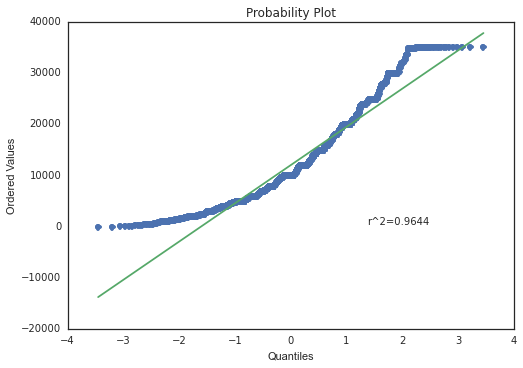

In [68]:
_=scipy.stats.probplot(loansData['Amount.Funded.By.Investors'].values, dist="norm", plot=plt)

Write a script called "prob_lending_club.py" that reads in the loan data, cleans it, and loads it into a pandas DataFrame. Use the script to generate and save a boxplot, histogram, and QQ-plot for the values in the "Amount.Requested" column. Be able to describe the result and how it compares with the values from the "Amount.Funded.By.Investors". Push your code to Github and enter the link below.

In [1]:
%%writefile scripts/prob_lending_club.py

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

def load_data(url):
    df = pd.read_csv(url)
    df.dropna(inplace=True)
    return df

def save_plots(df, column):
    f,ax=plt.subplots()
    df.boxplot(column=column, ax=ax)
    plt.savefig("../figs/lending_boxplot")
    f,ax=plt.subplots()
    df[column].hist(ax=ax, bins=30)
    plt.savefig("../figs/lending_histogram")
    f,ax=plt.subplots()
    _=scipy.stats.probplot(df[column].values, dist="norm", plot=plt)
    plt.savefig("../figs/lending_qqplot")
    
if __name__=="__main__":
    
    dataurl='https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv'
    df=load_data(dataurl)
    save_plots(df, "Amount.Requested")



Overwriting scripts/prob_lending_club.py


##Testing Lending Club Data